In [2]:
import sys
sys.path.insert(0,"/share/home/ychi/dev/hic_basic")
sys.path.insert(0,"/share/home/ychi/dev/hires_utils")
sys.path.insert(0,"/share/home/ychi/dev/sperm_struct")
from pathlib import Path

import pandas as pd
from lib.plot import plot_figure

In [4]:
ddir = Path("/shareb/ychi/repo/sperm_struct/notebooks/data/")
sdir = Path("/share/home/ychi/dev/sperm_struct")
#lr_contour = pd.read_pickle(ddir / "tillsperm25.lr_contour.pkl")
#dv_contour = pd.read_pickle(ddir / "tillsperm25.dv_contour.pkl")
lr_contour = pd.read_pickle(
    sdir / "notebooks" / "Fig1_contour" / "mESC.lr_contour.pkl")
#dv_contour = pd.read_pickle(ddir / "mESC.dv_contour.pkl")

In [5]:
batches = [
    "mESC"
]

arg_bfs_lr_ss_files = { # single slice
    batch : (ddir / batch).with_suffix(".lr_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_dv_ss_files = {
    batch : (ddir / batch).with_suffix(".dv_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_lr_ft_files = { # full thickness
    batch : (ddir / batch).with_suffix(".lr_ft.bfs.pkl")
    for batch in batches
}

arg_bfs_voxel_files = {
    batch : (ddir / batch).with_suffix(".voxel.bfs.pkl")
    for batch in batches
}

In [6]:
from hic_basic.plot.utils import filling_l2r_plotly
from plotly.subplots import make_subplots

from hic_basic.data import chromosomes

mm10 = chromosomes("mm10").index

In [23]:
def plot_chom_position(orig_bfs, chroms, title, contour, minCells=80):
    bfs = orig_bfs.copy()
    fig = make_subplots(
        rows = 3,
        cols = 7,
        subplot_titles=chroms,
        vertical_spacing=0.1
    )
    valid_cells = bfs.notna().sum(axis=1)
    # if minCells < 1: # treat as quantile
    #     minCells = valid_cells.quantile(minCells)
    # bfs = bfs.loc[valid_cells > minCells]
    for row, col, i, chrom in filling_l2r_plotly(3, 7, chroms):
        #print(row, col, i, chrom)
        use_cols = [ # multi index
            col
            for col in bfs.columns
            if col[0].startswith(chrom)
        ]
        chrom_dist = bfs.loc[
            :,
            use_cols
            ].mean(axis=1).copy()
        chrom_dist.loc[~contour] = pd.NA
        chrom_dist = chrom_dist.unstack(fill_value=pd.NA)
        subfig = plot_figure(
            chrom_dist
        )
        fig.add_trace(
            subfig.data[0],
            row = row,
            col = col
        )
    fig.update_traces(
        showscale = False
    )
    fig.update_layout(
        height = 600,
        width = 900,
        title = title,
        plot_bgcolor = "rgba(0,0,0,0)"
    )
    fig.update_xaxes(
        visible = False
    )
    fig.update_yaxes(
        visible = False
    )
    return fig

In [24]:
chrom = "chr1"
use_cols = [ # multi index
    col
    for col in bfs.columns
    if col[0].startswith(chrom)
]
chrom_dist = bfs.loc[
    :,
    use_cols
    ].mean(axis=1).copy()

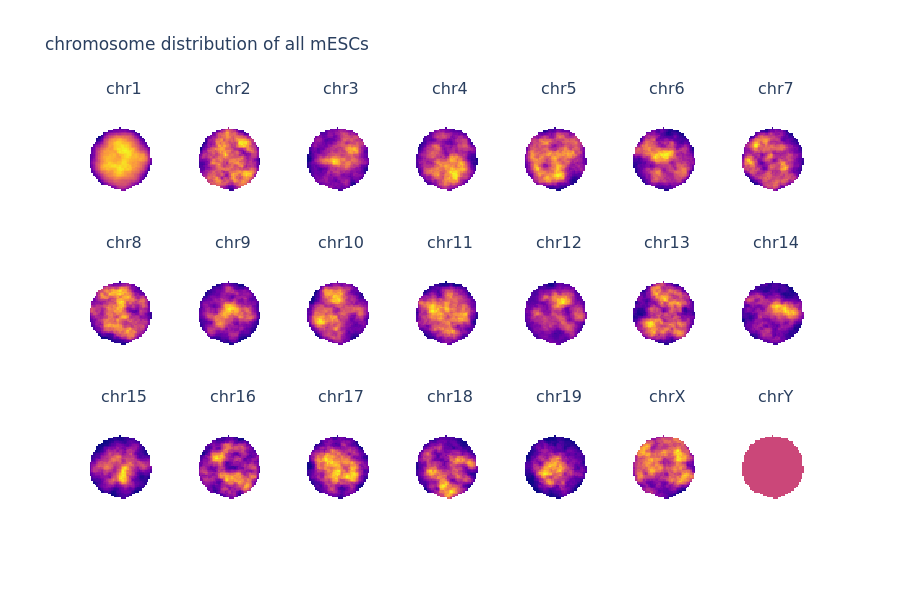

In [25]:
bfs = pd.read_pickle(arg_bfs_lr_ft_files["mESC"])
bfs = bfs.sort_index(axis=1)
fig = plot_chom_position(
    bfs,
    mm10,
    "chromosome distribution of all mESCs",
    lr_contour,
    #minCells=80
    )
fig.show(renderer="png")

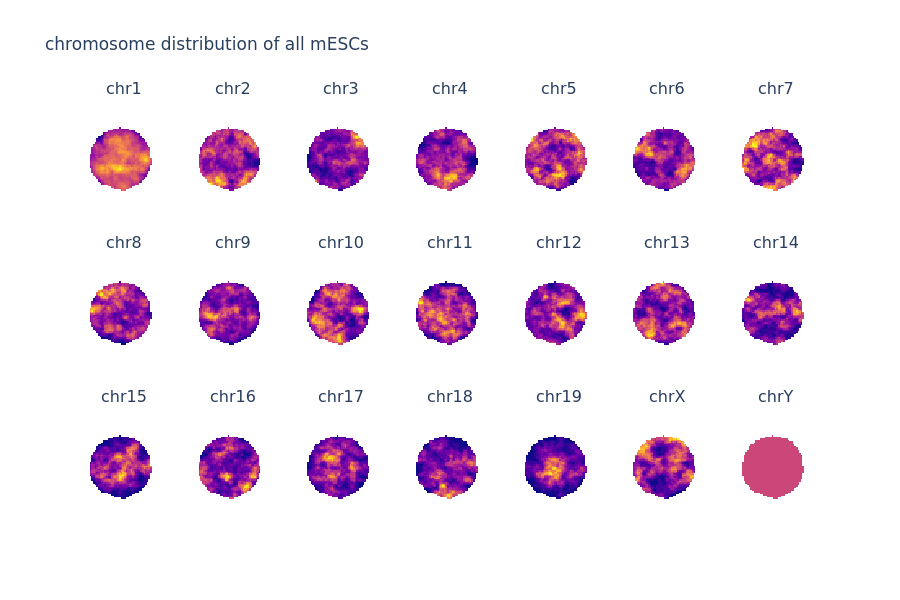

In [26]:
#bfs = pd.read_pickle(arg_bf_lr_cs_files["tillsperm25"])
#bfs = bfs.loc[-5:5].groupby(level=(1,2), observed=False).sum(min_count=1)
bfs = pd.read_pickle(arg_bfs_lr_ss_files["mESC"])
fig = plot_chom_position(
    bfs,
    mm10,
    "chromosome distribution of all mESCs",
    lr_contour,
    #minCells=80
    )
fig.show(renderer="png")
#fig.show()